<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Exploratory Data Analysis on a Natural Language Processing Task
> Authors: Caroline Schmitt, Matt Brems

---

Exploratory data analysis (EDA) is a crucial part of any data science project. EDA helps us discover interesting relationships in the data, detect outliers and errors, examine our own assumptions about the data, and prepare for modeling. During EDA we might discover that we need to clean our data more conscientiously, or that we have more missing data than we realized, or that there aren't many patterns in the data (indicating that modeling may be challenging.)

In this lab you'll bring in a natural language dataset and perform EDA. The dataset contains Facebook statuses taken from between 2009 and 2011 as well as personality test results associated with the users whose Facebook statuses are included.

This dataset uses results from the Big Five Personality Test, also referred to as the five-factor model, which measures a person's score on five dimensions of personality:
- **O**penness
- **C**onscientiousness
- **E**xtroversion
- **A**greeableness
- **N**euroticism

Notoriously, the political consulting group Cambridge Analytica claims to have predicted the personalities of Facebook users by using those users' data, with the goal of targeting them with political ads that would be particularly persuasive given their personality type. Cambridge Analytica claims to have considered 32 unique 'groups' in the following fashion:
- For each of the five OCEAN qualities, a user is categorized as either 'yes' or 'no'.
- This makes for 32 different potential combinations of qualities. ($2^5 = 32$).

Cambridge Analytica's methodology was then, roughly, the following:
- Gather a large amount of data from Facebook.
- Use this data to predict an individual's Big Five personality "grouping."
- Design political advertisements that would be particularly effective to that particular "grouping." (For example, are certain advertisements particularly effective toward people with specific personality traits?)

In this lab you will perform EDA to examine many relationships in the data.

Exploratory data analysis can be a non-linear process, and you're encouraged to explore questions that occur to you as you work through the notebook.

> **Content note**: This dataset contains real Facebook statuses scraped from 2009 to 2011, and some of the statuses contain language that is not safe for work, crude, or offensive. The full dataset is available as `mypersonality.csv`, and a sanitized version containing only statuses that passed an automated profanity check is available as `mypersonality_noprofanity.csv`. Please do not hesitate to use `mypersonality_noprofanity.csv` if you would prefer to. Please note that the automated profanity check is not foolproof. If you have any concerns about working with this dataset, please get in touch with your instructional team.

---

### External resources

These resources are not required reading but may be of use or interest.

- [Python Graph Gallery](https://python-graph-gallery.com/)
- [Wikipedia page](https://en.wikipedia.org/wiki/Big_Five_personality_traits) on the Big Five test
- [A short (3-4 pages) academic paper](./celli-al_wcpr13.pdf) using the `MyPersonality` dataset to model personality

---

## Load packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from nltk.tokenize import RegexpTokenizer
from sklearn.feature_extraction.text import CountVectorizer

# This setting widens how many characters pandas will display 
# in a column:
pd.options.display.max_colwidth = 400

sns.set(style='white')

---

## Load data

In [2]:
df = pd.read_csv('data/mypersonality.csv')

# NOTICE! Do read the commented out code below...
# df = pd.read_csv('data/mypersonality_noprofanity.csv') 
# comment out above & 
# uncomment this to use mypersonality_noprofanity.csv if it 
# makes you more comfortable

df.drop(columns=['NETWORKSIZE', 'BETWEENNESS', 'NBETWEENNESS', 
                 'DENSITY', 'BROKERAGE', 'NBROKERAGE', 
                 'TRANSITIVITY'], inplace=True)
df.head(3)

,#AUTHID,STATUS,sEXT,sNEU,sAGR,sCON,sOPN,cEXT,cNEU,cAGR,cCON,cOPN,DATE
0,b7b7764cfa1c523e4e93ab2a79a946c4,likes the sound of thunder.,2.65,3.0,3.15,3.25,4.4,n,y,n,n,y,06/19/09 03:21 PM
1,b7b7764cfa1c523e4e93ab2a79a946c4,is so sleepy it's not even funny that's she can't get to sleep.,2.65,3.0,3.15,3.25,4.4,n,y,n,n,y,07/02/09 08:41 AM
2,b7b7764cfa1c523e4e93ab2a79a946c4,"is sore and wants the knot of muscles at the base of her neck to stop hurting. On the other hand, YAY I'M IN ILLINOIS! <3",2.65,3.0,3.15,3.25,4.4,n,y,n,n,y,06/15/09 01:15 PM


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9916 entries, 0 to 9915
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   #AUTHID  9916 non-null   object 
 1   STATUS   9916 non-null   object 
 2   sEXT     9916 non-null   float64
 3   sNEU     9916 non-null   float64
 4   sAGR     9916 non-null   float64
 5   sCON     9916 non-null   float64
 6   sOPN     9916 non-null   float64
 7   cEXT     9916 non-null   object 
 8   cNEU     9916 non-null   object 
 9   cAGR     9916 non-null   object 
 10  cCON     9916 non-null   object 
 11  cOPN     9916 non-null   object 
 12  DATE     9916 non-null   object 
dtypes: float64(5), object(8)
memory usage: 1007.2+ KB


In [4]:
#check for missing values
df.isnull().sum()

#AUTHID    0
STATUS     0
sEXT       0
sNEU       0
sAGR       0
sCON       0
sOPN       0
cEXT       0
cNEU       0
cAGR       0
cCON       0
cOPN       0
DATE       0
dtype: int64

---

## EDA on Statuses

Before we even vectorize the text, we might look at the lengths and word counts in each Facebook status.

**Create a new column called `status_length` that contains the length of each status:**

In [5]:
#a new column called status_length that contains the length of each status
df['status_length'] = df['STATUS'].str.len()

In [6]:
#checking simple statistic 
df['status_length'].describe().round(2)

count    9916.00
mean       80.65
std        68.24
min         2.00
25%        34.00
50%        60.00
75%       104.00
max       435.00
Name: status_length, dtype: float64

**Create a new column called `status_word_count` that contains the number of words in each status:**

Note: You can evaluate this based off of how many strings are separated by whitespaces; you're not required to check that each set of characters set apart by whitespaces is a word in the dictionary.

In [7]:
# Instantiate RegExp Tokenizer
tokenizer = RegexpTokenizer(r'\w+')

In [8]:
#change all text to lower case
df['STATUS'] = df['STATUS'].str.lower()

In [9]:
#a new column called status_word_count that contains the number of words in each status
df['status_word_count'] = df['STATUS'].apply(lambda x: len(tokenizer.tokenize(x)))

In [10]:
#Checking simple statistic
df['status_word_count'].describe().round(2)

count    9916.00
mean       14.98
std        12.95
min         0.00
25%         6.00
50%        11.00
75%        19.00
max        95.00
Name: status_word_count, dtype: float64

### Longest and shortest statuses

Looking at individual observations can help us get a sense of what the dataset contains.

**Show the five longest and five shortest statuses based off of `status_word_count`:**

In [11]:
#five longest statuses based off of status_word_count
df.nlargest(n=5, columns=['status_word_count'])

,#AUTHID,STATUS,sEXT,sNEU,sAGR,sCON,sOPN,cEXT,cNEU,cAGR,cCON,cOPN,DATE,status_length,status_word_count
7976,d7e500ad854a1b6ced39e53a525b8a6d,"""i said he's a fairy i do suppose//flyin thru the air in pantyhose//he may be very sexy or even cute//but he looks like a sucka in a blue and red suit//i said you need a man who's got finesse//& his whole name across his chest//he may be able to fly all thru the night//but can he rock a party til the early light//he can't satisfy you with his little worm//but i can bust you out w my super sper...",3.25,4.25,2.75,2.00,3.75,n,y,n,n,n,10/21/09 10:39 PM,429,95
496,9a8cf1dcb2de1a8f70c4745a636bbb96,"exact words when renewing dl: me: oh no, you can't take my license, it's my 25th b-day. how am i going to get into the bar? dmv: we gonna give you a new one over there me: but, it won't have my picture and stuff on it. dmv: hold up, we can take a picture of your picture and put it on a license i think. (yelling at co-worker to see if this can be done) yup! me: so, i can go to the bar?! dmv: ...",3.75,3.25,4.50,5.00,4.00,y,y,y,y,y,10/30/09 02:05 PM,413,94
6989,502db2fcfe26705ae16a46c5cb2ad2e5,"if i wear makeup, i'm fake. if i like to get dressed up, i'm a tart. if i say what i think, i'm a bitch. if i cry sometimes, i'm a drama queen. if i have guy friends, i'm a slut. if i stand up for myself, i'm mouthy. seems like you can't do anything now a days without being labeled.. so what, go ahead and label me, see if i give a shit. repost this if your proud of who you are! x x",3.20,3.30,4.55,3.20,4.45,n,y,y,n,y,02/18/11 08:33 AM,384,92
5208,c85845b82e705a32f674757d8912df23,"can't believe it. i got the new wii fit plus game, it has a lot of fun new games and features. however, after not using the wii fit for a few months we decided to do the fitness test stuff again. me(since last time): +2.9 lbs, still a healthy weight and bmi, wii age 54. *propname*: -8.6lbs, reccommends a healthy weight of gaining 6lbs, wii age 32. on the positive side, i have lost 5 of the 8 l...",2.25,2.75,4.50,4.25,2.50,n,n,y,y,n,01/08/10 07:32 PM,426,88
8026,d7e500ad854a1b6ced39e53a525b8a6d,"heh...:""god i wish that i could hide away//and find a wall to bang my brains//i'm living in a fantasy,//a nightmare dream...reality//people ride about all day//in metal boxes made away//i wish that they would drop the bomb//and kill these cunts//that don't belong! i hate people!//i hate the human race//i hate people!//i hate your ugly face//i hate people!//i hate your fucking mess//i hate peop...",3.25,4.25,2.75,2.00,3.75,n,y,n,n,n,10/29/09 06:08 AM,435,86


In [12]:
#five shortest statuses based off of status_word_count
df.nsmallest(n=5, columns=['status_word_count'])

,#AUTHID,STATUS,sEXT,sNEU,sAGR,sCON,sOPN,cEXT,cNEU,cAGR,cCON,cOPN,DATE,status_length,status_word_count
200,ecbddbfe00e0f83cfdb802a7186061c7,:)))))))),4.30,2.15,3.60,3.30,4.10,y,n,y,n,y,11/22/09 09:39 PM,9,0
427,b9a44bb356832160caccc9eb3614e0ce,>.<,3.65,3.15,3.45,2.35,4.50,y,y,n,n,y,10/15/09 11:28 PM,3,0
440,b9a44bb356832160caccc9eb3614e0ce,...?,3.65,3.15,3.45,2.35,4.50,y,y,n,n,y,06/24/09 03:23 AM,4,0
2081,65266a09dc3d274bed54447cf4565392,:'(,2.90,2.65,3.45,3.45,4.00,n,n,n,n,y,07/03/09 08:20 PM,3,0
3280,b4a21c82de4011033c8ac67081ff939c,:(,4.55,2.20,3.30,3.90,3.65,y,n,n,y,n,02/03/10 04:43 AM,2,0


## What's the distribution of post lengths?

Use visuals to show the distributions of post lengths. Show both the distribution of word counts and the distribution of lengths based off character.

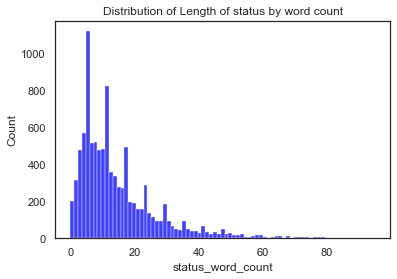

In [13]:
sns.histplot(data=df['status_word_count'], color ='blue', palette= 'muted').set(title='Distribution of Length of status by word count');

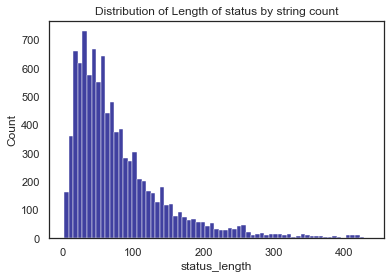

In [14]:
sns.histplot(data=df['status_length'], color ='navy', palette= 'muted').set(title='Distribution of Length of status by string count');

The length and the word count of Facebook status are right skewed.

---

## EDA of Personality Scores

There are two sets of personality columns in the dataset: class and score. According to the attached paper, scores have been converted to categories based on whether a score for a user fell above or below the median.

### Plot the distributions of personality scores for all five score columns:

In [15]:
numerical = [var for var in df.columns if df[var].dtype!='O']

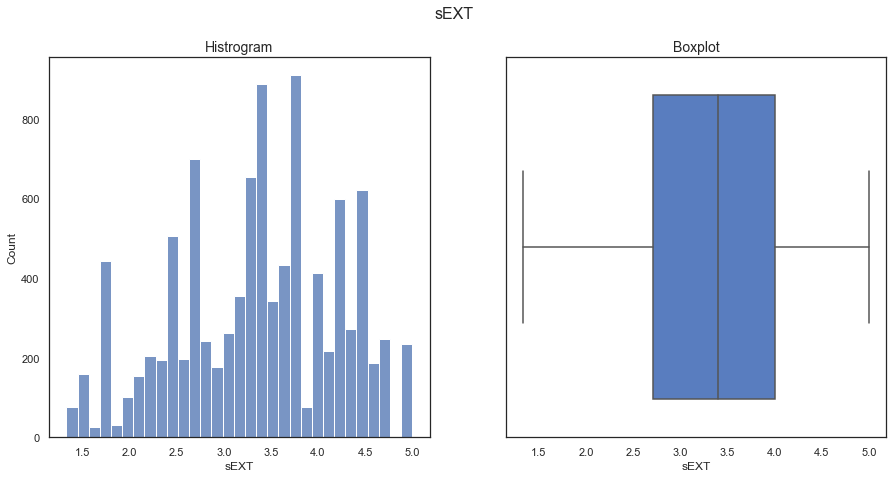

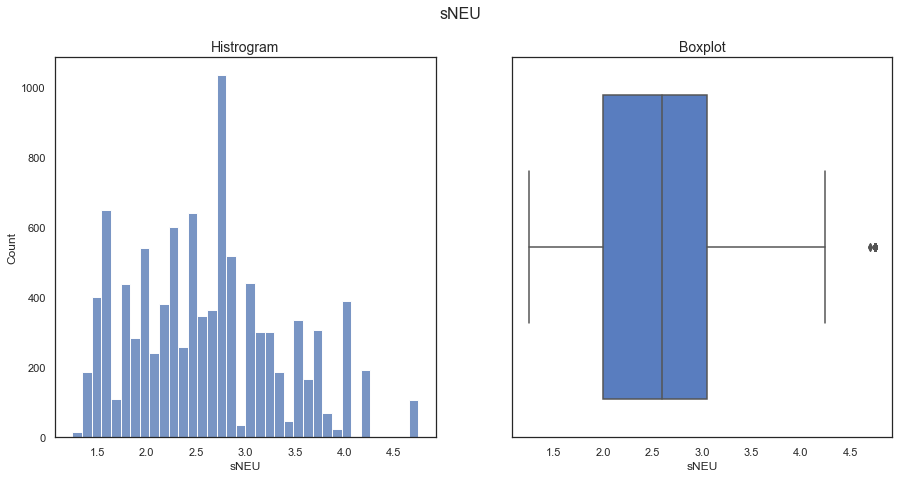

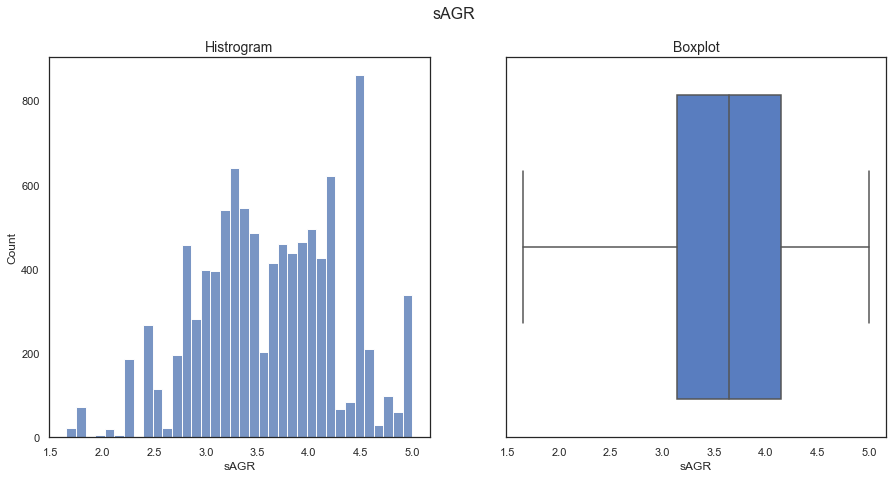

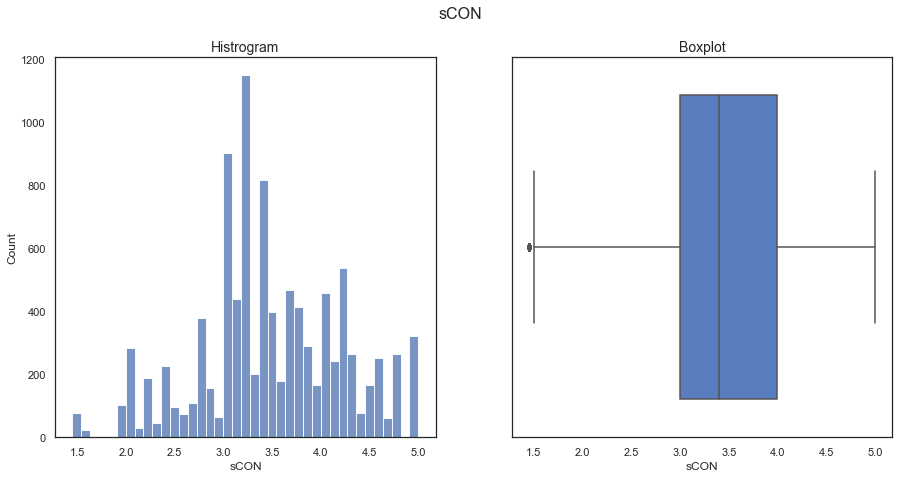

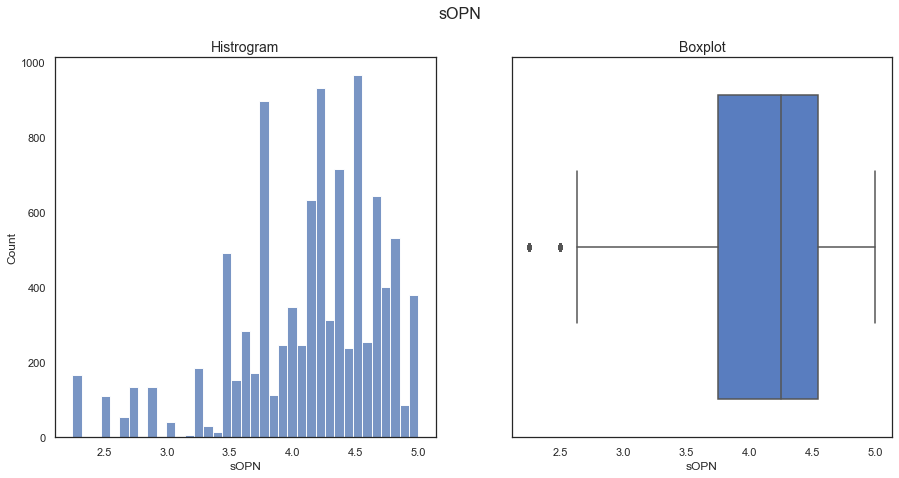

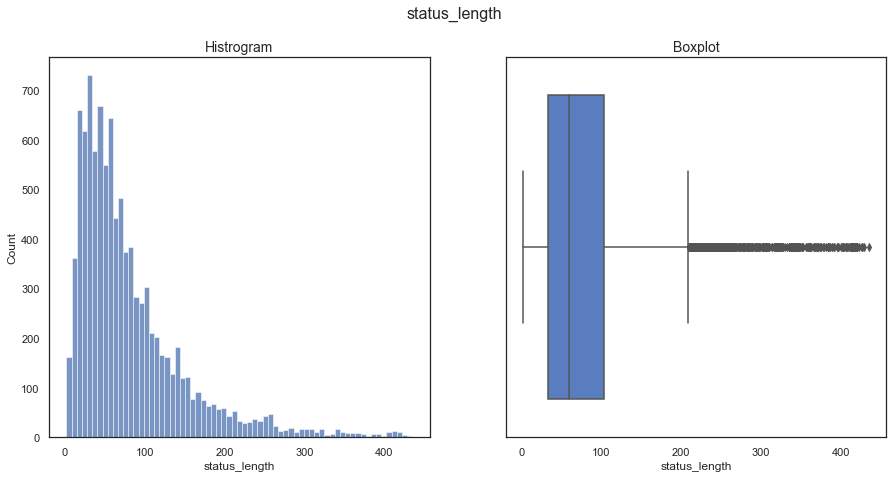

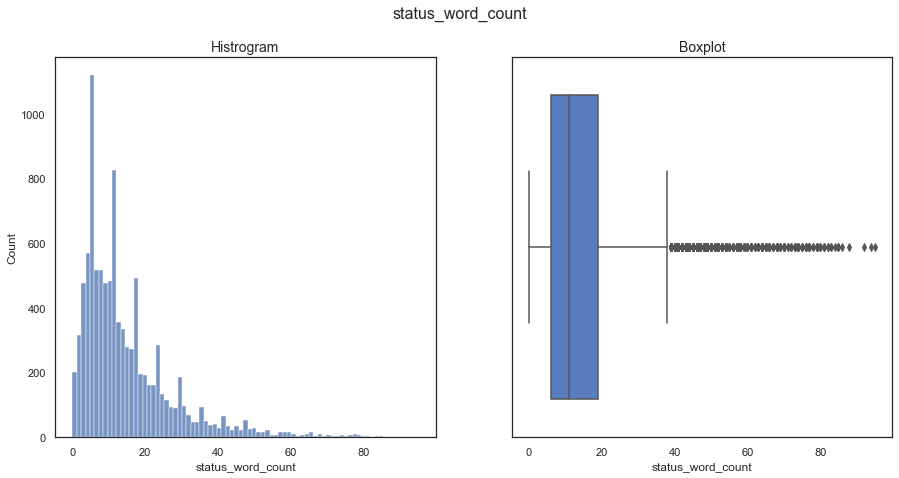

In [16]:
for col in numerical:
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,7))
    ax = ax.ravel() 
    fig.suptitle(f"{col}\n", fontsize=16)
    ax[0].set_title(f'Histrogram', fontsize =14)
    sns.histplot(df[col], ax=ax[0],  palette= 'muted')
    ax[1].set_title(f'Boxplot', fontsize =14)
    sns.boxplot(x=df[col], ax=ax[1],  palette= 'muted')
    plt.show()

---

### How many unique users exist in the dataset?

This dataset has redacted original poster names, but each user is given an `#AUTHID`. How many unique users are there, and how many posts per user do we have?

In [17]:
#250 unique users
df['#AUTHID'].nunique()

250

In [18]:
#number of posts per user
df.groupby(['#AUTHID'])['STATUS'].agg(['count'])

,count
#AUTHID,
00419a4c96b32cd63b2c7196da761274,1
02c37028a782cfda660c7243e45244bb,6
03133a828cd0cf52e3752813ce5d818f,5
03e6c4eca4269c183fa0e1780f73faba,8
06b055f8e2bca96496514891057913c3,12
...,...
f83aa7290cf3ae8ed75d6aee5ebbb559,6
fbe5aa478508d1dc931427ade5d9e1b4,3
fc1c9fb6c64740edcbbf8cfe9dde8b02,30


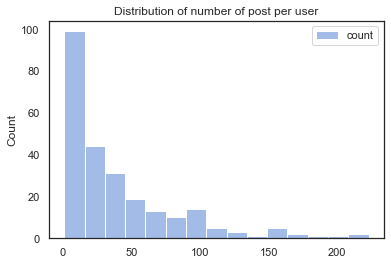

In [19]:
#visualization of number of posts per user
sns.histplot(data=df.groupby(['#AUTHID'])['STATUS'].agg(['count']), color ='navy', palette= 'muted')\
.set(title='Distribution of number of post per user');

The majority of user post less than post per user. while there are a few user that post more than 200 posts. 

## EDA on unique users

Because we have many posts per user for most users, doing EDA on the personality score columns might be misleading. If we have 200 Facebook statuses from one very high-conscientiousness user, a bar chart of how many `'cCON'` statuses are associated with `'y'` might be misleading. We'll have to be careful about labeling and titling any visualizations we make off of the dataset.

**Create a new dataframe called `unique_users` that only contains the `#AUTHID`, personality score, and personality category columns:**

If you do this correctly, it should have 250 rows and 11 columns.

(Hint: You can use the pandas [drop_duplicates()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop_duplicates.html) method to make this easier. The only column you want to consider when deciding if a user is duplicated is the `#AUTHID` column.)

In [21]:
#new dataframe called unique_users that only contains the #AUTHID, personality score, and personality category columns
unique_users = df.drop_duplicates(subset='#AUTHID', keep='first', inplace=False, ignore_index=True)
unique_users.drop(columns = ['STATUS','DATE','status_length','status_word_count'], axis = 1 , inplace =True)

C:\Users\science01\AppData\Local\Temp\ipykernel_21568\1132248136.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unique_users.drop(columns = ['STATUS','DATE','status_length','status_word_count'], axis = 1 , inplace =True)


In [22]:
unique_users

,#AUTHID,sEXT,sNEU,sAGR,sCON,sOPN,cEXT,cNEU,cAGR,cCON,cOPN
0,b7b7764cfa1c523e4e93ab2a79a946c4,2.65,3.00,3.15,3.25,4.40,n,y,n,n,y
1,318bf822d4f2bd3920367560218619c0,4.50,4.00,3.00,4.50,3.75,y,y,n,y,n
2,ecbddbfe00e0f83cfdb802a7186061c7,4.30,2.15,3.60,3.30,4.10,y,n,y,n,y
3,db39f7b2aad360b1033ec1f8fcd57f9c,4.65,3.20,3.05,3.65,4.75,y,y,n,y,y
4,4d035bd3fd8d9595d15cea9e388964be,3.70,2.90,3.40,3.35,4.05,y,y,n,n,y
...,...,...,...,...,...,...,...,...,...,...,...
245,a764ca41dca158d7a191505dcc8ce47f,3.70,2.50,4.20,4.10,3.60,y,n,y,y,n
246,deb899e426c1a5c66c24eeb0d7df6257,2.15,2.15,4.10,2.90,4.60,n,n,y,n,y
247,ea28a927cb6663480ea33ca917c3c8ba,4.05,3.35,3.80,3.95,4.50,y,y,y,y,y
248,5532642937eb3497a43e15dbb23a9d2d,1.40,4.05,3.30,3.40,3.95,n,y,n,n,y


**Plot the distribution of personality scores for `unique_users`:**

Do the distributions look different? Here, each individual user will only be represented once.

In [23]:
numerical = [var for var in unique_users.columns if unique_users[var].dtype!='O']

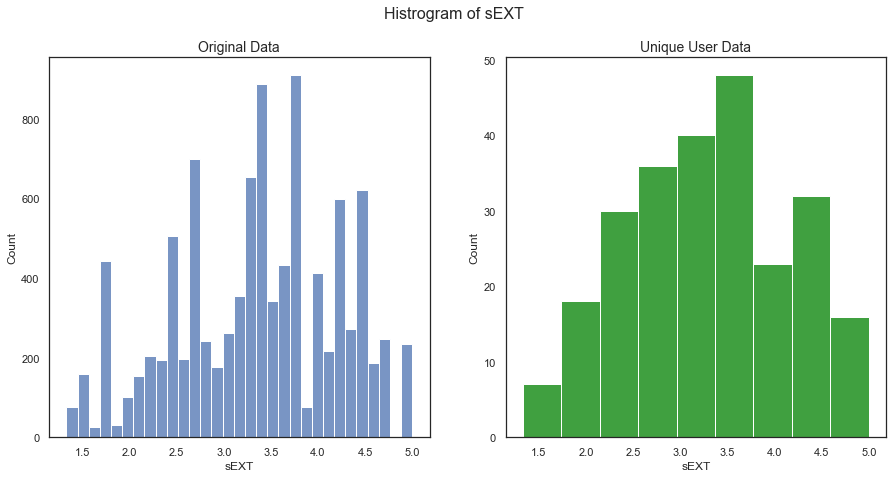

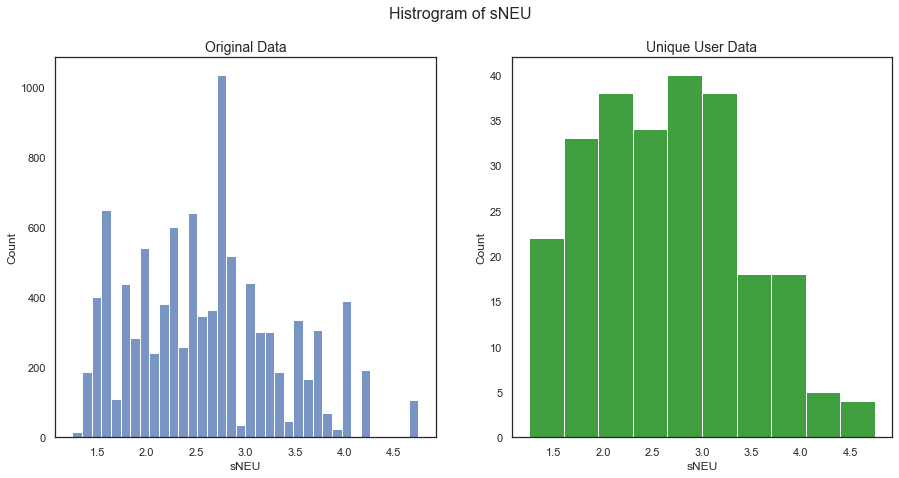

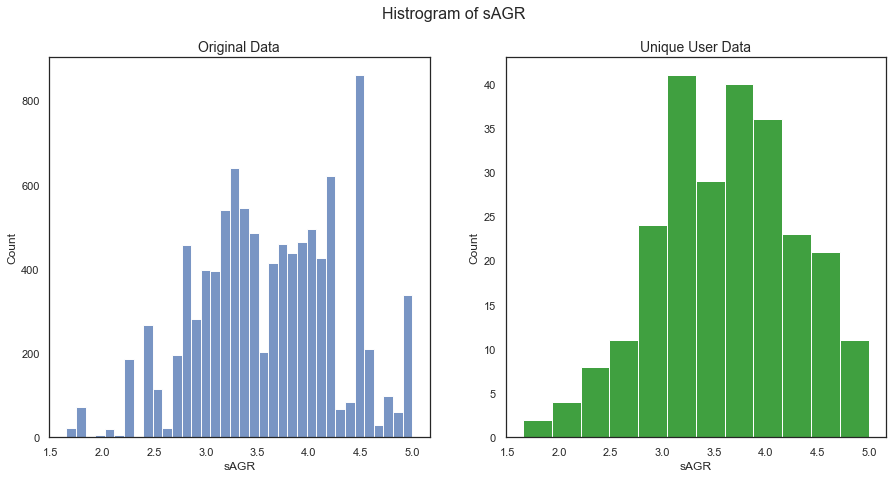

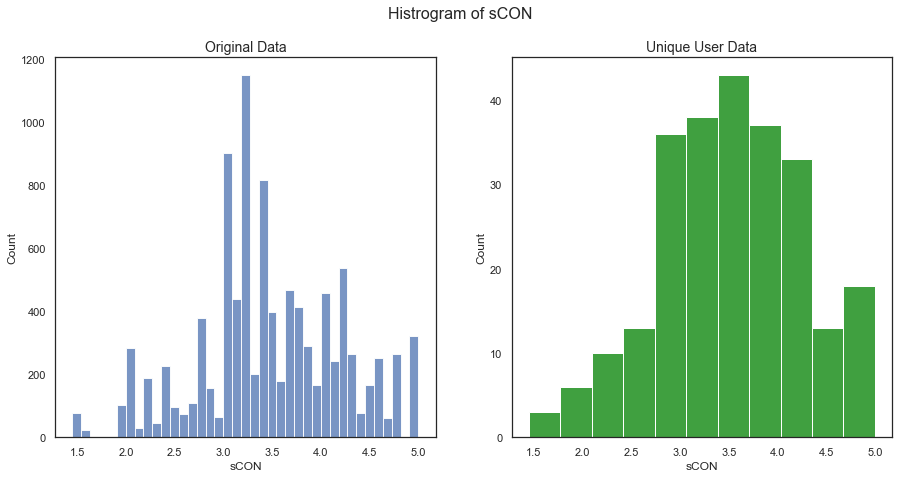

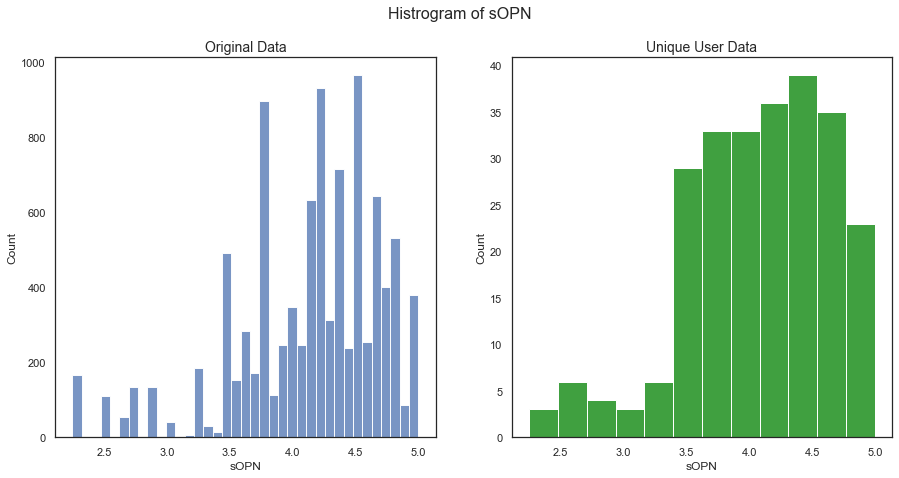

In [24]:
for col in numerical:
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,7))
    ax = ax.ravel() 
    fig.suptitle(f"Histrogram of {col}\n", fontsize=16)
    ax[0].set_title(f'Original Data', fontsize =14)
    sns.histplot(df[col], ax=ax[0],  palette= 'muted')
    ax[1].set_title(f'Unique User Data', fontsize =14)
    sns.histplot(x=unique_users[col], ax=ax[1], color='green', palette= 'muted')
    plt.show()

The distribution of data from unique user dataset are different from original data. The distribution of data from unique user dataset are more uniformed. 

**Use the `.describe()` method on `unique_users`:**

In [25]:
unique_users.describe(include='all').round(2)

,#AUTHID,sEXT,sNEU,sAGR,sCON,sOPN,cEXT,cNEU,cAGR,cCON,cOPN
count,250,250.00,250.00,250.00,250.00,250.00,250,250,250,250,250
unique,250,NaN,NaN,NaN,NaN,NaN,2,2,2,2,2
top,b7b7764cfa1c523e4e93ab2a79a946c4,NaN,NaN,NaN,NaN,NaN,n,n,y,y,y
freq,1,NaN,NaN,NaN,NaN,NaN,154,151,134,130,176
mean,NaN,3.29,2.63,3.60,3.52,4.08,NaN,NaN,NaN,NaN,NaN
std,NaN,0.86,0.78,0.67,0.74,0.58,NaN,NaN,NaN,NaN,NaN
min,NaN,1.33,1.25,1.65,1.45,2.25,NaN,NaN,NaN,NaN,NaN
25%,NaN,2.66,2.00,3.15,3.00,3.75,NaN,NaN,NaN,NaN,NaN
50%,NaN,3.30,2.59,3.66,3.50,4.15,NaN,NaN,NaN,NaN,NaN
75%,NaN,4.00,3.15,4.10,4.05,4.50,NaN,NaN,NaN,NaN,NaN


In [26]:
unique_users.describe().round(2)

,sEXT,sNEU,sAGR,sCON,sOPN
count,250.00,250.00,250.00,250.00,250.00
mean,3.29,2.63,3.60,3.52,4.08
std,0.86,0.78,0.67,0.74,0.58
min,1.33,1.25,1.65,1.45,2.25
25%,2.66,2.00,3.15,3.00,3.75
50%,3.30,2.59,3.66,3.50,4.15
75%,4.00,3.15,4.10,4.05,4.50
max,5.00,4.75,5.00,5.00,5.00


### Plots vs. Tables

Consider what different information is easily conveyed by the plots of scores, versus the table with summary statistics. Explain when you might present a distribution versus when you might present a table of summary statistics.

The plots of scores convey overview pictures of how the scores distributed, while summary statistics convey specific number of related statistics. 

#### Other visualizations:

Create 1-2 additional visualizations related to the `unique_users` dataframe.

You might consider:
- Bar charts of users per category per trait
- Seaborn correlation heatmap
- Seaborn pairplot

### Bar charts of users per category per trait

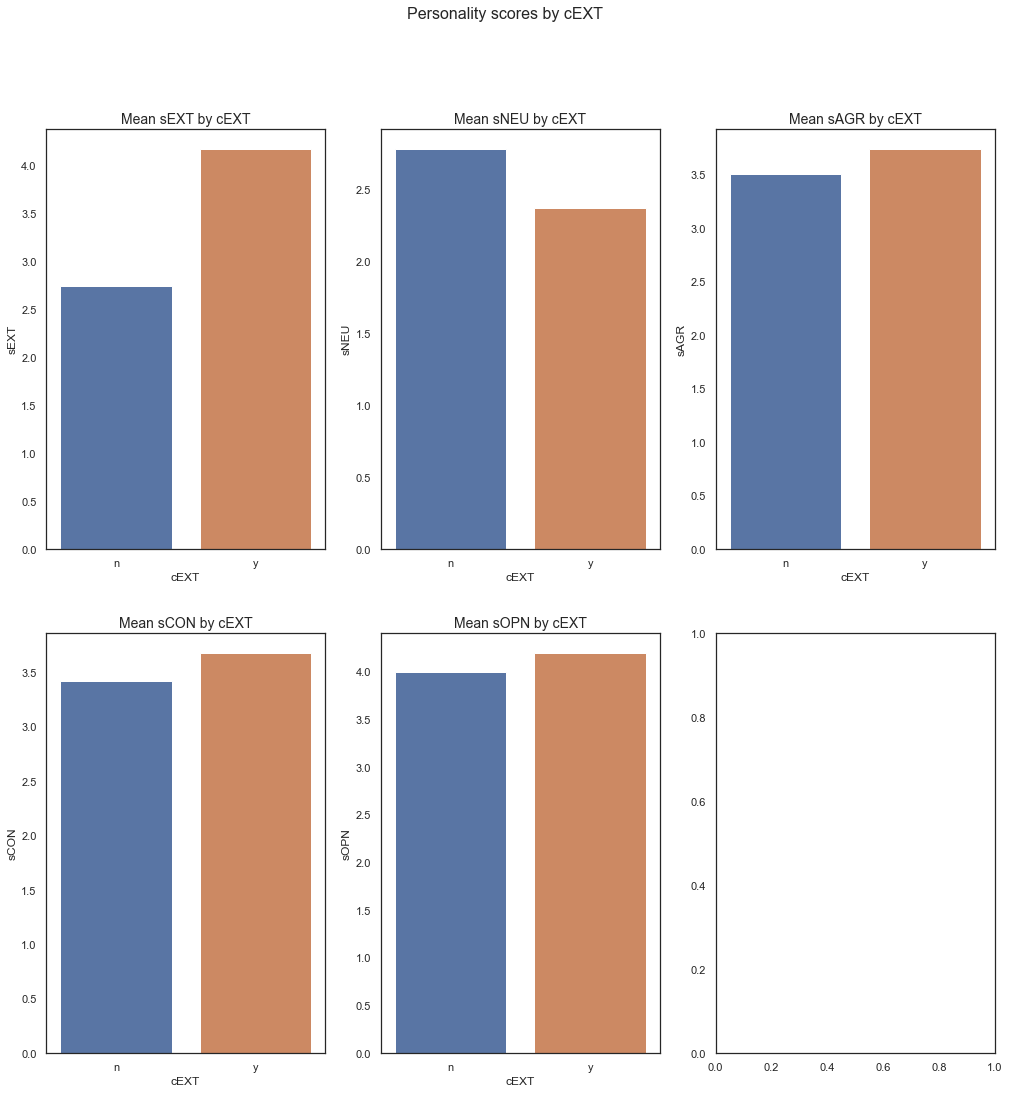

In [27]:
grouped = unique_users.groupby('cEXT', as_index=False)
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(17,17))
ax = ax.ravel() 
fig.suptitle("Personality scores by cEXT", fontsize=16)

means = grouped['sEXT'].mean()
ax[0].set_title('Mean sEXT by cEXT', fontsize =14)
sns.barplot(ax=ax[0], x='cEXT', y='sEXT', data=means)


means = grouped['sNEU'].mean()
ax[1].set_title('Mean sNEU by cEXT', fontsize =14)
sns.barplot(ax=ax[1], x='cEXT', y='sNEU', data=means)

means = grouped['sAGR'].mean()
ax[2].set_title('Mean sAGR by cEXT', fontsize =14)
sns.barplot(ax=ax[2], x='cEXT', y='sAGR', data=means)


means = grouped['sCON'].mean()
ax[3].set_title('Mean sCON by cEXT', fontsize =14)
sns.barplot(ax=ax[3], x='cEXT', y='sCON', data=means)


means = grouped['sOPN'].mean()
ax[4].set_title('Mean sOPN by cEXT', fontsize =14)
sns.barplot(ax=ax[4], x='cEXT', y='sOPN', data=means)

plt.show()


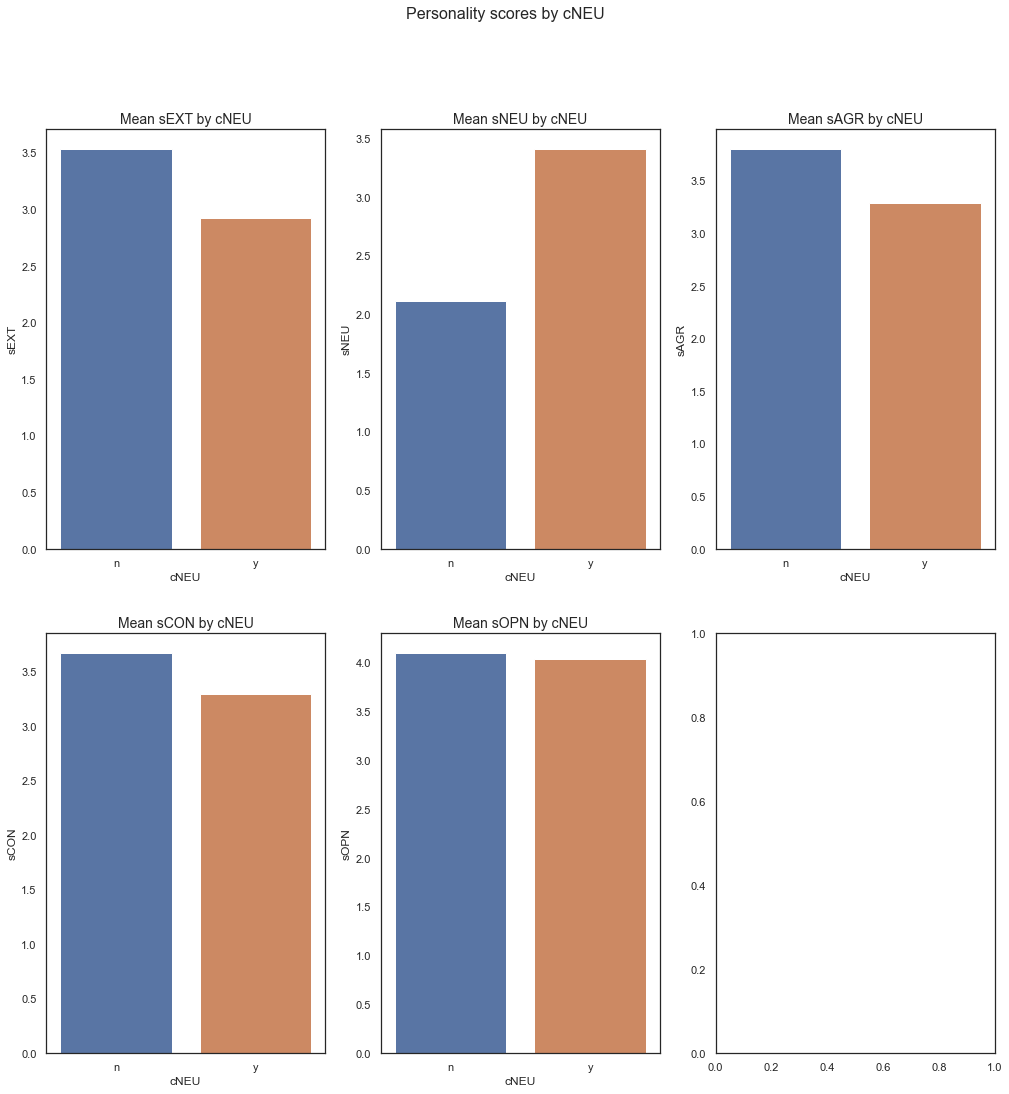

In [28]:
grouped = unique_users.groupby('cNEU', as_index=False)
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(17,17))
ax = ax.ravel() 
fig.suptitle("Personality scores by cNEU", fontsize=16)

means = grouped['sEXT'].mean()
ax[0].set_title('Mean sEXT by cNEU', fontsize =14)
sns.barplot(ax=ax[0], x='cNEU', y='sEXT', data=means)


means = grouped['sNEU'].mean()
ax[1].set_title('Mean sNEU by cNEU', fontsize =14)
sns.barplot(ax=ax[1], x='cNEU', y='sNEU', data=means)

means = grouped['sAGR'].mean()
ax[2].set_title('Mean sAGR by cNEU', fontsize =14)
sns.barplot(ax=ax[2], x='cNEU', y='sAGR', data=means)


means = grouped['sCON'].mean()
ax[3].set_title('Mean sCON by cNEU', fontsize =14)
sns.barplot(ax=ax[3], x='cNEU', y='sCON', data=means)


means = grouped['sOPN'].mean()
ax[4].set_title('Mean sOPN by cNEU', fontsize =14)
sns.barplot(ax=ax[4], x='cNEU', y='sOPN', data=means)

plt.show()

In [ ]:
grouped = unique_users.groupby('cAGR', as_index=False)
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(17,17))
ax = ax.ravel() 
fig.suptitle("Personality scores by cAGR", fontsize=16)

means = grouped['sEXT'].mean()
ax[0].set_title('Mean sEXT by cAGR', fontsize =14)
sns.barplot(ax=ax[0], x='cAGR', y='sEXT', data=means)


means = grouped['sNEU'].mean()
ax[1].set_title('Mean sNEU by cAGR', fontsize =14)
sns.barplot(ax=ax[1], x='cAGR', y='sNEU', data=means)

means = grouped['sAGR'].mean()
ax[2].set_title('Mean sAGR by cAGR', fontsize =14)
sns.barplot(ax=ax[2], x='cAGR', y='sAGR', data=means)


means = grouped['sCON'].mean()
ax[3].set_title('Mean sCON by cAGR', fontsize =14)
sns.barplot(ax=ax[3], x='cAGR', y='sCON', data=means)


means = grouped['sOPN'].mean()
ax[4].set_title('Mean sOPN by cAGR', fontsize =14)
sns.barplot(ax=ax[4], x='cAGR', y='sOPN', data=means)

plt.show()

In [ ]:
grouped = unique_users.groupby('cCON', as_index=False)
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(17,17))
ax = ax.ravel() 
fig.suptitle("Personality scores by cCON", fontsize=16)

means = grouped['sEXT'].mean()
ax[0].set_title('Mean sEXT by cCON', fontsize =14)
sns.barplot(ax=ax[0], x='cCON', y='sEXT', data=means)


means = grouped['sNEU'].mean()
ax[1].set_title('Mean sNEU by cCON', fontsize =14)
sns.barplot(ax=ax[1], x='cCON', y='sNEU', data=means)

means = grouped['sAGR'].mean()
ax[2].set_title('Mean sAGR by cCON', fontsize =14)
sns.barplot(ax=ax[2], x='cCON', y='sAGR', data=means)


means = grouped['sCON'].mean()
ax[3].set_title('Mean sCON by cCON', fontsize =14)
sns.barplot(ax=ax[3], x='cCON', y='sCON', data=means)


means = grouped['sOPN'].mean()
ax[4].set_title('Mean sOPN by cCON', fontsize =14)
sns.barplot(ax=ax[4], x='cCON', y='sOPN', data=means)

plt.show()

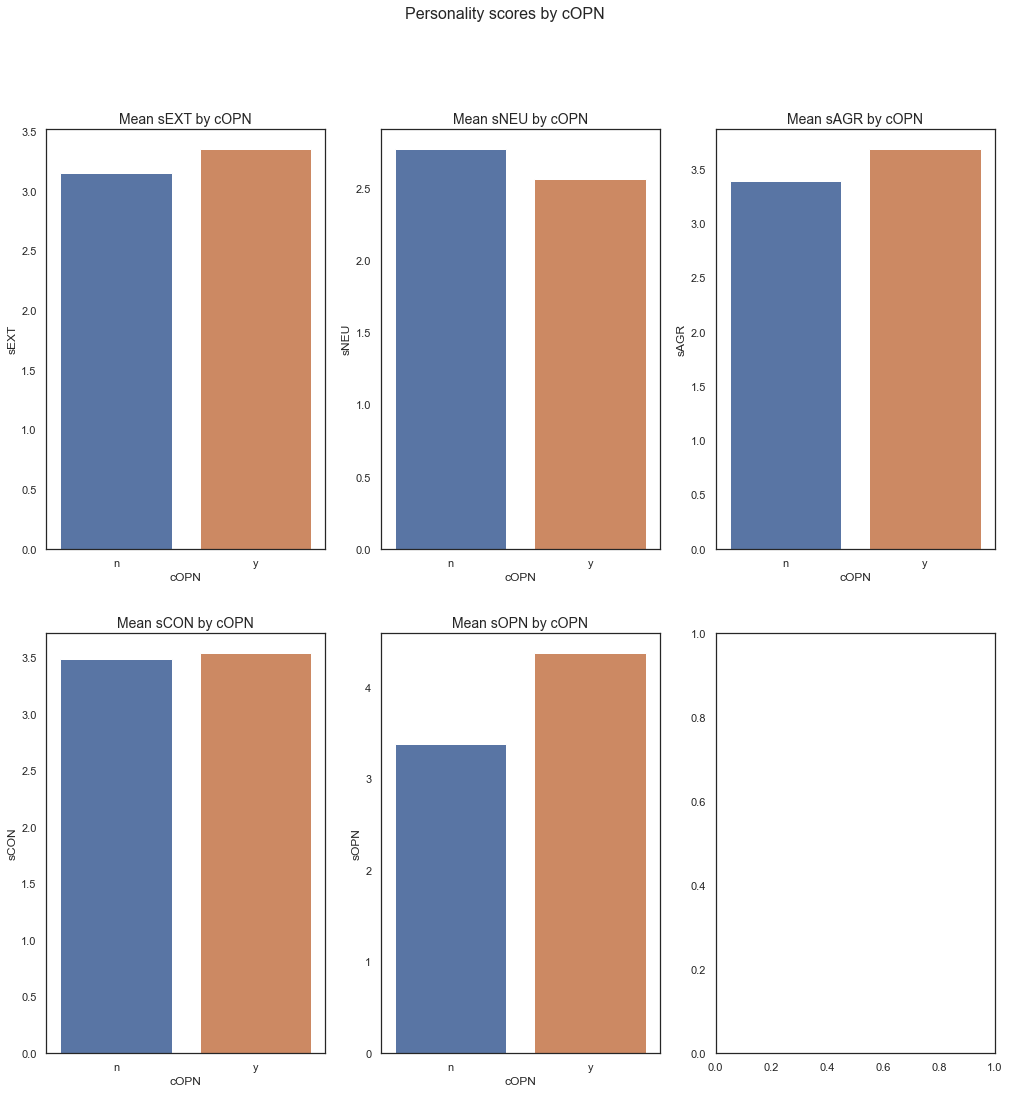

In [29]:
grouped = unique_users.groupby('cOPN', as_index=False)
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(17,17))
ax = ax.ravel() 
fig.suptitle("Personality scores by cOPN", fontsize=16)

means = grouped['sEXT'].mean()
ax[0].set_title('Mean sEXT by cOPN', fontsize =14)
sns.barplot(ax=ax[0], x='cOPN', y='sEXT', data=means)


means = grouped['sNEU'].mean()
ax[1].set_title('Mean sNEU by cOPN', fontsize =14)
sns.barplot(ax=ax[1], x='cOPN', y='sNEU', data=means)

means = grouped['sAGR'].mean()
ax[2].set_title('Mean sAGR by cOPN', fontsize =14)
sns.barplot(ax=ax[2], x='cOPN', y='sAGR', data=means)


means = grouped['sCON'].mean()
ax[3].set_title('Mean sCON by cOPN', fontsize =14)
sns.barplot(ax=ax[3], x='cOPN', y='sCON', data=means)


means = grouped['sOPN'].mean()
ax[4].set_title('Mean sOPN by cOPN', fontsize =14)
sns.barplot(ax=ax[4], x='cOPN', y='sOPN', data=means)

plt.show()

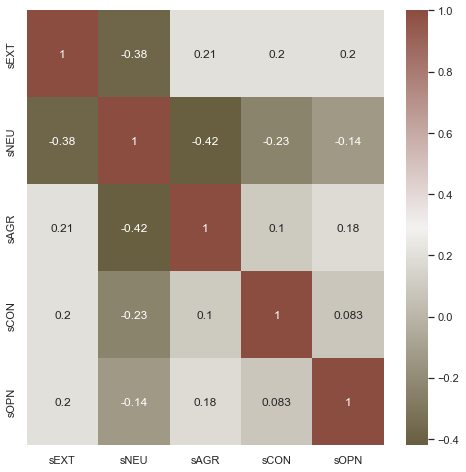

In [30]:
#Seaborn correlation heatmap
cmap = sns.diverging_palette(70,20,s=50, l=40, n=6,as_cmap=True)
corrmat= unique_users.corr()
f, ax = plt.subplots(figsize=(8,8))
sns.heatmap(corrmat,cmap=cmap,annot=True, );

The subcategories of personality test scores are slightly correlated indicating these are distinct features. 

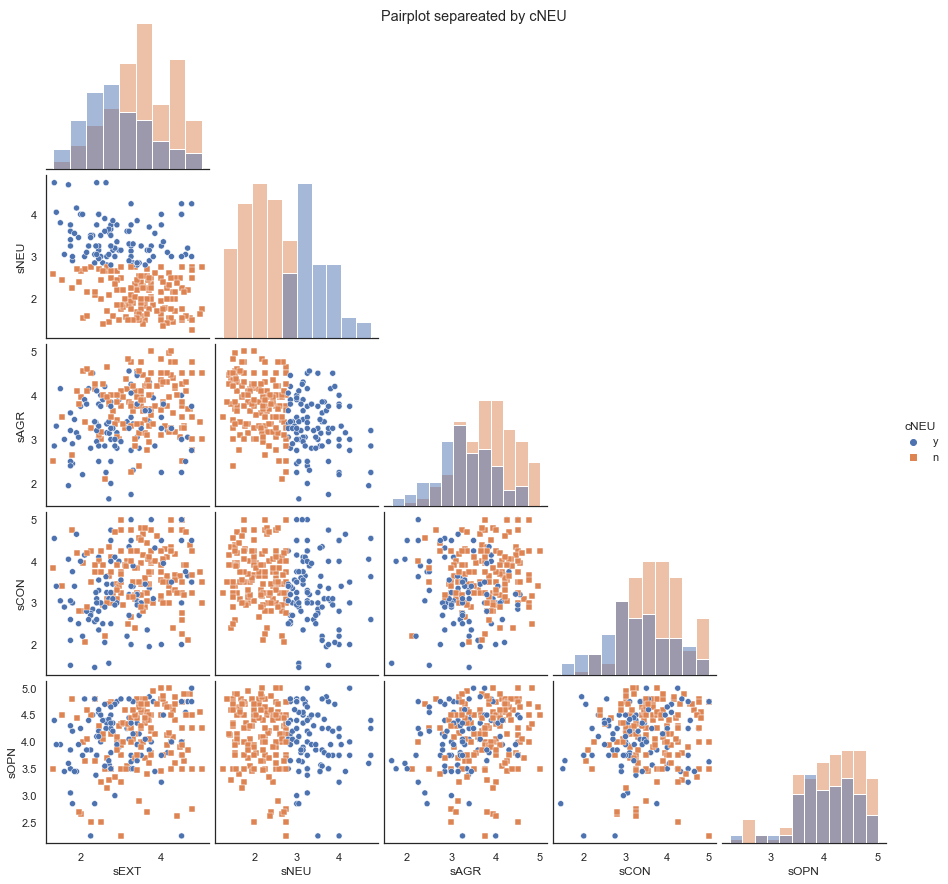

In [31]:
#Pairplot separeated by cNEU
pp = sns.pairplot(unique_users, hue='cNEU', diag_kind='hist', markers=['o', 's'], corner=True)
pp.fig.suptitle('Pairplot separeated by cNEU');

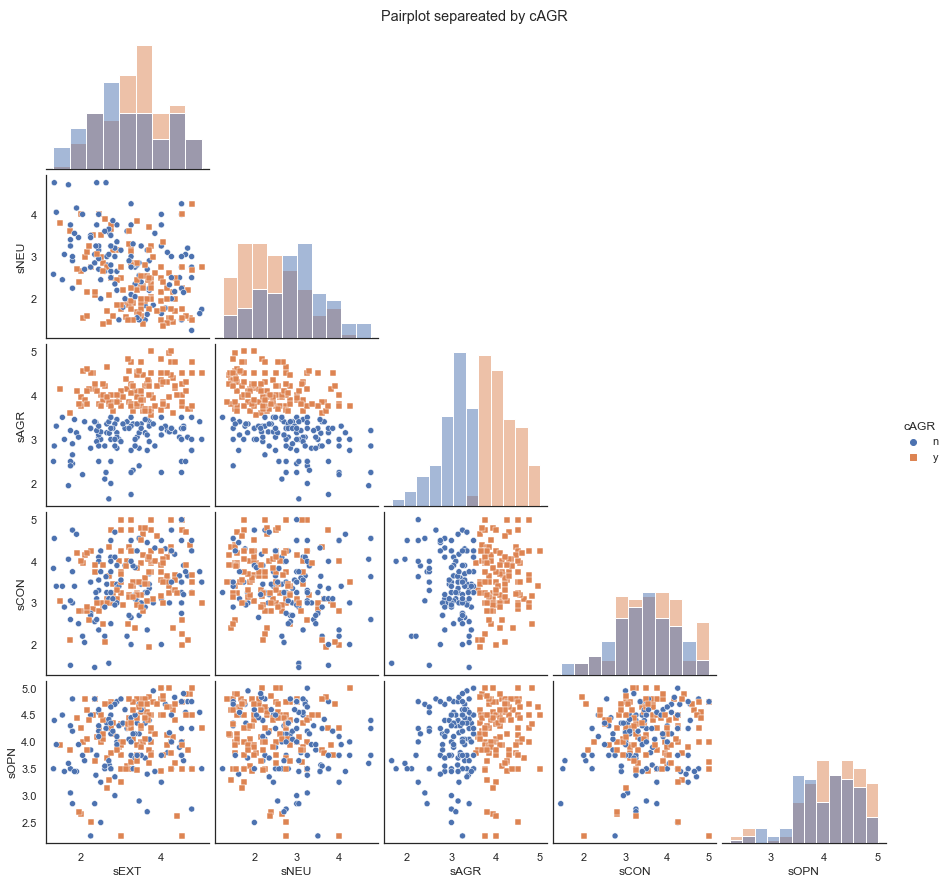

In [32]:
#Pairplot separeated by cAGR
pp = sns.pairplot(unique_users, hue='cAGR', diag_kind='hist', markers=['o', 's'], corner=True)
pp.fig.suptitle('Pairplot separeated by cAGR');

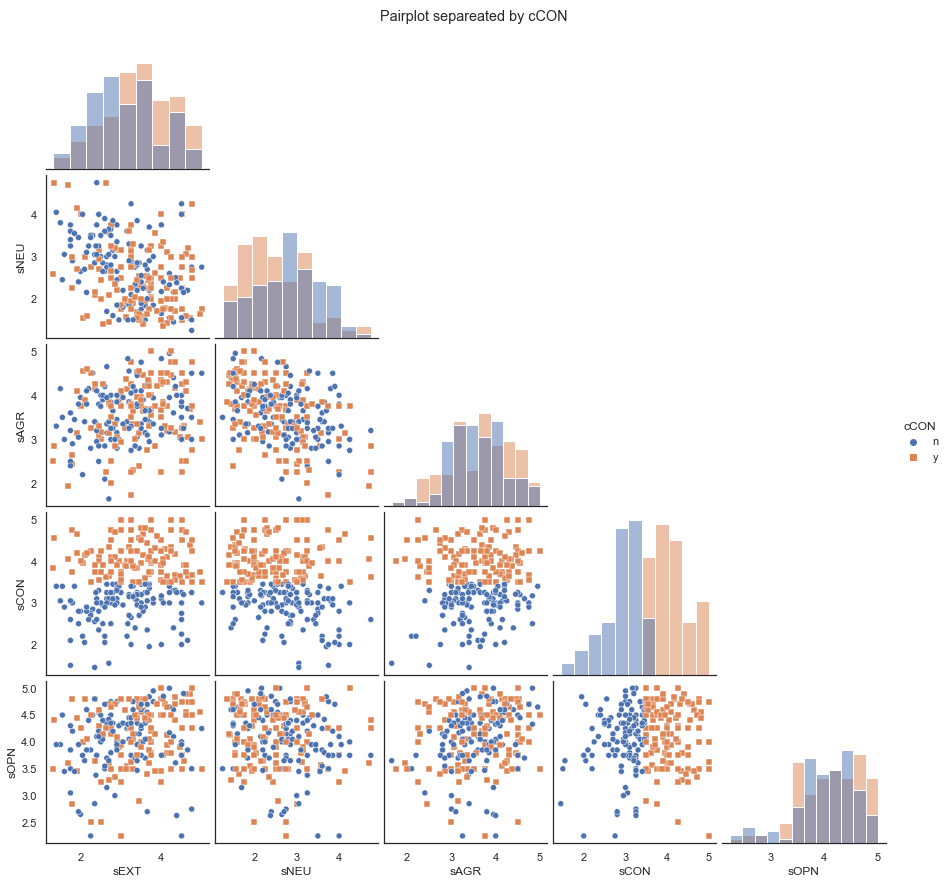

In [33]:
#Pairplot separeated by cCON
pp = sns.pairplot(unique_users, hue='cCON', diag_kind='hist', markers=['o', 's'], corner=True)
pp.fig.suptitle('Pairplot separeated by cCON');

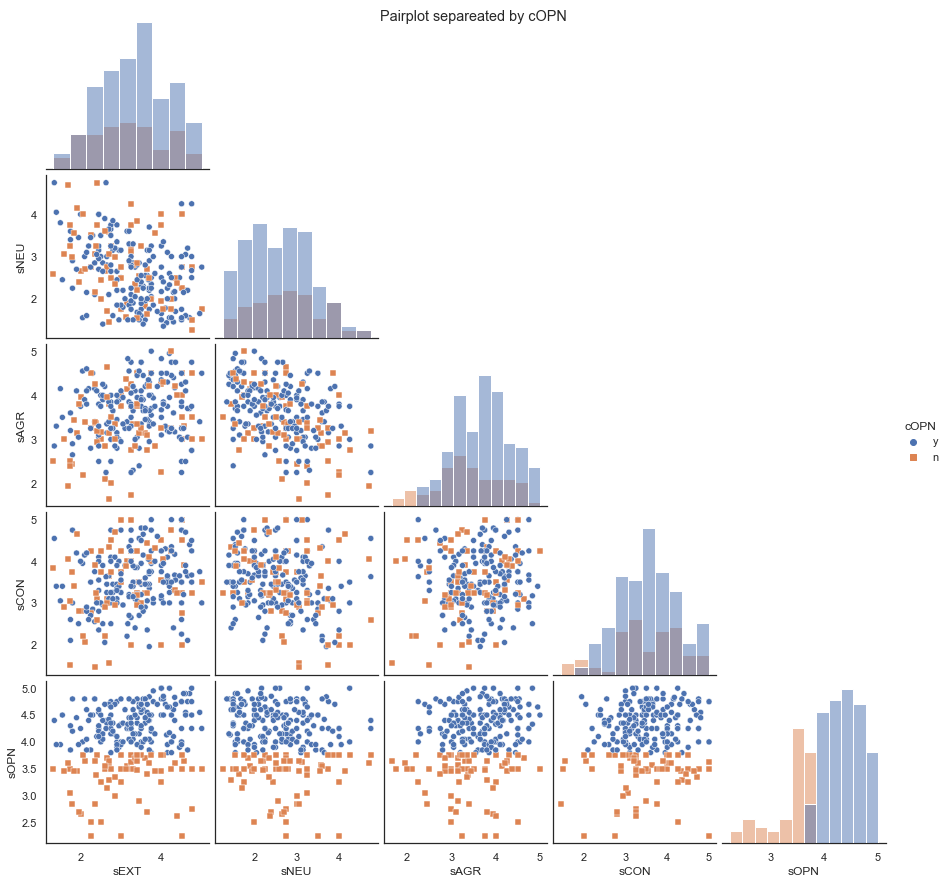

In [34]:
#Pairplot separeated by cOPN
pp = sns.pairplot(unique_users, hue='cOPN', diag_kind='hist', markers=['o', 's'], corner=True)
pp.fig.suptitle('Pairplot separeated by cOPN');

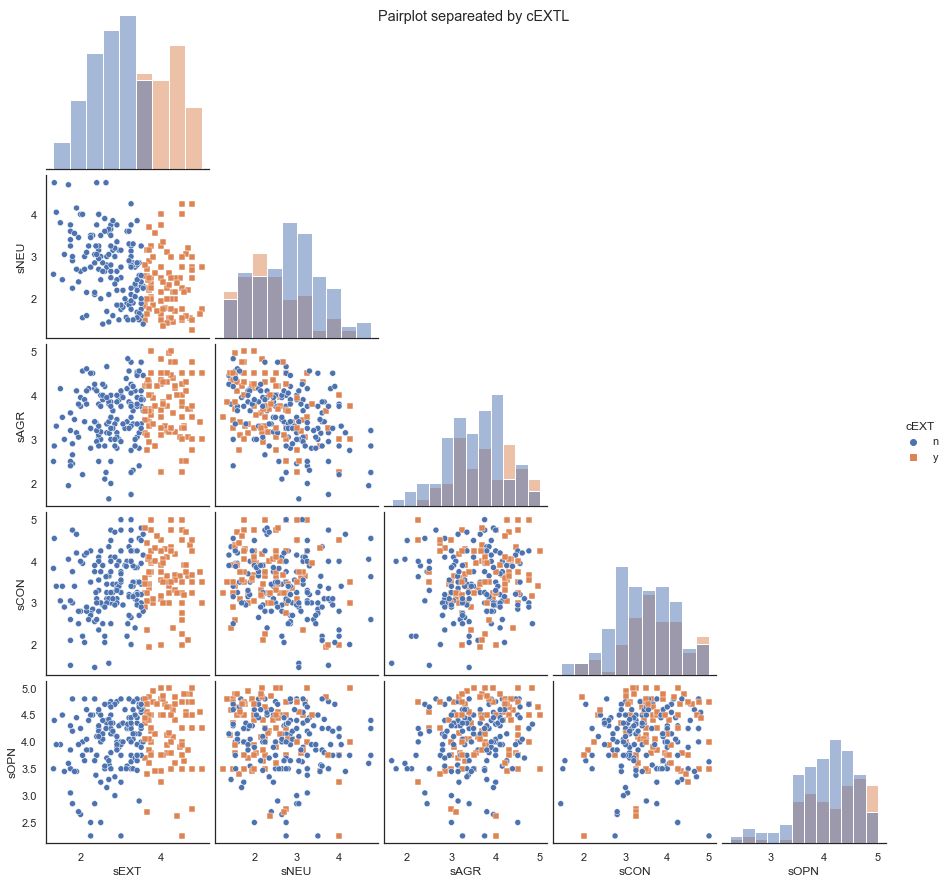

In [35]:
#Pairplot separeated by cEXTL
pp = sns.pairplot(unique_users, hue='cEXT', diag_kind='hist', markers=['o', 's'], corner=True)
pp.fig.suptitle('Pairplot separeated by cEXTL');

---

## Exploring status length and word count based on personality

**Using `groupby()`, find the mean status length and status word count for posts by users in the high and low categories of each of the Big 5 traits.**

You'll need to use `groupby()` five separate times for this.

In [36]:
df.groupby(['cEXT'])['status_length','status_word_count'].agg(['mean']).round(2)

C:\Users\science01\AppData\Local\Temp\ipykernel_21568\3064187111.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(['cEXT'])['status_length','status_word_count'].agg(['mean']).round(2)


,status_length,status_word_count
,mean,mean
cEXT,,
n,79.87,14.85
y,81.70,15.15


In [37]:
df.groupby(['cNEU'])['status_length','status_word_count'].agg(['mean']).round(2)

C:\Users\science01\AppData\Local\Temp\ipykernel_21568\1766837154.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(['cNEU'])['status_length','status_word_count'].agg(['mean']).round(2)


,status_length,status_word_count
,mean,mean
cNEU,,
n,80.85,15.02
y,80.30,14.91


In [38]:
df.groupby(['cAGR'])['status_length','status_word_count'].agg(['mean']).round(2)

C:\Users\science01\AppData\Local\Temp\ipykernel_21568\3117044026.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(['cAGR'])['status_length','status_word_count'].agg(['mean']).round(2)


,status_length,status_word_count
,mean,mean
cAGR,,
n,80.98,15.08
y,80.36,14.90


In [39]:
df.groupby(['cCON'])['status_length','status_word_count'].agg(['mean']).round(2)

C:\Users\science01\AppData\Local\Temp\ipykernel_21568\571901960.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(['cCON'])['status_length','status_word_count'].agg(['mean']).round(2)


,status_length,status_word_count
,mean,mean
cCON,,
n,81.92,15.25
y,79.15,14.66


In [40]:
df.groupby(['cOPN'])['status_length','status_word_count'].agg(['mean']).round(2)

C:\Users\science01\AppData\Local\Temp\ipykernel_21568\3785974484.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(['cOPN'])['status_length','status_word_count'].agg(['mean']).round(2)


,status_length,status_word_count
,mean,mean
cOPN,,
n,85.69,16.01
y,78.91,14.63


**Choose one of the personality category columns (i.e. `cOPN`, `cCON`, `cEXT`, `cAGR`, or `cNEU`.) Use `sns.distplot()` to visualize the distribution of status word counts for posts by users who score both high (`y`) and low (`n`) in that personality category:**

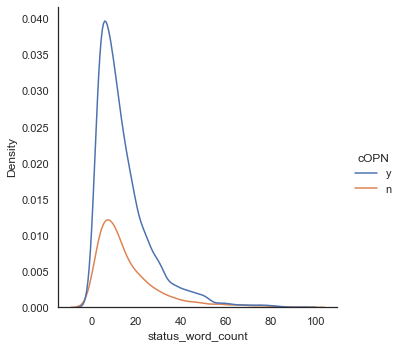

In [41]:
sns.displot(x='status_word_count', hue='cOPN', kind="kde", data=df);

---

## EDA on Word Counts

### Vectorize the text

In order to perform EDA on word count data, we'll need to count-vectorize.

Create a dataframe that contains the count-vectorized text for each Facebook status in the dataset.

To do this, you might follow these steps:
- Instantiate a `CountVectorizer` object
- Fit the count vectorizer on the Facebook statuses
- Store the transformed data
- Convert to a dataframe and store
    - Don't forget that the transformed data will need to be 'densified'. The `toarray()` or `todense()` methods will allow this.
    - Don't forget that the `get_feature_names()` method on a fitted `CountVectorizer` object will bring you back the words learned from the dataset, which you can set as the `columns` argument when creating the dataframe.
    
It's up to you whether or not to keep stopwords in the dataset.

In [48]:
# Instantiate a CountVectorizer.
cvec = CountVectorizer(stop_words='english')
# Fit and transform the vectorizer on our corpus.
df_cvec= cvec.fit_transform(df['STATUS'])
df_cvec

<9916x15183 sparse matrix of type '<class 'numpy.int64'>'
	with 69665 stored elements in Compressed Sparse Row format>

In [49]:
df_cvec = pd.DataFrame(df_cvec.todense(), columns=cvec.get_feature_names_out())
df_cvec

,00,000,000ft,00am,00pm,01,02,02pm,03,0330,...,équipe,étais,était,étant,état,été,être,østersund,últimas,últimos
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9911,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9912,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9913,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9914,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Show the 15 most common words

In [50]:
df_cvec.sum().sort_values(ascending = False).head(15)

propname    1309
just         717
day          534
like         506
time         424
going        414
today        402
new          386
work         369
good         354
got          314
night        312
love         292
tomorrow     277
know         276
dtype: int64

### Show the 15 frequency of the most common words as a bar chart

**Hint**: You can do this in one line of code. [This webpage](https://dfrieds.com/data-visualizations/bar-plot-python-pandas.html) has an example.

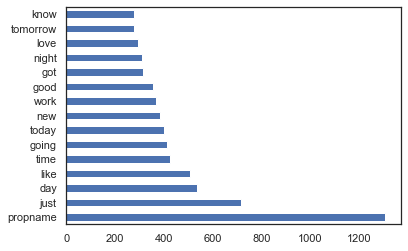

In [51]:
df_cvec.sum().sort_values(ascending =False).head(15).plot.barh();

### Investigating `propname`

The word `propname` shows up frequently in this dataset. Show the first 10 statuses in the dataset that contain `propname`:

In [52]:
df[df['STATUS'].str.contains("propname")].head(10)

,#AUTHID,STATUS,sEXT,sNEU,sAGR,sCON,sOPN,cEXT,cNEU,cAGR,cCON,cOPN,DATE,status_length,status_word_count
6,b7b7764cfa1c523e4e93ab2a79a946c4,"saw a nun zombie, and liked it. also, *propname* + tentacle!man + psychic powers = great party.",2.65,3.00,3.15,3.25,4.40,n,y,n,n,y,06/27/09 05:41 AM,95,15
18,b7b7764cfa1c523e4e93ab2a79a946c4,"is tired. *propname*, let me go to sleep pl0x.",2.65,3.00,3.15,3.25,4.40,n,y,n,n,y,07/11/09 05:44 AM,46,9
69,b7b7764cfa1c523e4e93ab2a79a946c4,has a fair idea of how to manage the 2.5 kids cliche... she just needs a very strong gentleman named *propname* and thriteen wet napkins.,2.65,3.00,3.15,3.25,4.40,n,y,n,n,y,11/24/09 05:07 AM,137,26
101,b7b7764cfa1c523e4e93ab2a79a946c4,has a serious crush on *propname*. <3,2.65,3.00,3.15,3.25,4.40,n,y,n,n,y,01/25/10 02:57 AM,37,7
104,318bf822d4f2bd3920367560218619c0,mondays are the new thursdays- anthony bourdain + *propname* = forgetting your financial troubles,4.50,4.00,3.00,4.50,3.75,y,y,n,y,n,06/23/09 05:41 AM,98,12
118,318bf822d4f2bd3920367560218619c0,is *propname*'s bestbian,4.50,4.00,3.00,4.50,3.75,y,y,n,y,n,08/23/09 06:03 AM,24,4
139,318bf822d4f2bd3920367560218619c0,is in love with *propname*.,4.50,4.00,3.00,4.50,3.75,y,y,n,y,n,10/04/09 03:09 AM,27,5
158,318bf822d4f2bd3920367560218619c0,is in love. with *propname*.,4.50,4.00,3.00,4.50,3.75,y,y,n,y,n,12/11/09 05:35 AM,28,5
170,318bf822d4f2bd3920367560218619c0,ten movies to watch right now (and some you can instant netflix) 1. la vie en rose 2. shrink (if you love la) 3. paris je'taime (if you love paris) 3. clay pidgeons (*propname* is priceless) 4. quills 5. away we go 6. sunshine cleaning 7. a league of their own 8. smart people (i heart *propname*'s page and sjp) 9. frost//nixon 10. doubt,4.50,4.00,3.00,4.50,3.75,y,y,n,y,n,10/11/09 01:39 AM,338,67
202,ecbddbfe00e0f83cfdb802a7186061c7,"attention everyone!!! vote for the short ""after hours"" to support *propname* - our local michigan talent and a wonderful person. repost please!!! http:////www.thirteen.org//sites//reel13//category//vote//",4.30,2.15,3.60,3.30,4.10,y,n,y,n,y,11/24/09 07:11 AM,204,29


**Provide a short explanation of what you believe `propname` to be:**

#propname might be name of account of other people that mentioned in status

## Most common words based on personality category

In order to do more targeted EDA, we'll need to be able to reference not only the dataframe of vectorized statuses, but also the personality scores from the original dataframe.

**Create a new dataframe called `text_and_scores` that concatenates the count-vectorized statuses side-by-side with the original personality category columns:**

In [53]:
text_and_scores = pd.concat([df, df_cvec], axis=1)
text_and_scores 

,#AUTHID,STATUS,sEXT,sNEU,sAGR,sCON,sOPN,cEXT,cNEU,cAGR,...,équipe,étais,était,étant,état,été,être,østersund,últimas,últimos
0,b7b7764cfa1c523e4e93ab2a79a946c4,likes the sound of thunder.,2.65,3.00,3.15,3.25,4.40,n,y,n,...,0,0,0,0,0,0,0,0,0,0
1,b7b7764cfa1c523e4e93ab2a79a946c4,is so sleepy it's not even funny that's she can't get to sleep.,2.65,3.00,3.15,3.25,4.40,n,y,n,...,0,0,0,0,0,0,0,0,0,0
2,b7b7764cfa1c523e4e93ab2a79a946c4,"is sore and wants the knot of muscles at the base of her neck to stop hurting. on the other hand, yay i'm in illinois! <3",2.65,3.00,3.15,3.25,4.40,n,y,n,...,0,0,0,0,0,0,0,0,0,0
3,b7b7764cfa1c523e4e93ab2a79a946c4,likes how the day sounds in this new song.,2.65,3.00,3.15,3.25,4.40,n,y,n,...,0,0,0,0,0,0,0,0,0,0
4,b7b7764cfa1c523e4e93ab2a79a946c4,is home. <3,2.65,3.00,3.15,3.25,4.40,n,y,n,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9911,deb899e426c1a5c66c24eeb0d7df6257,little things give you away.,2.15,2.15,4.10,2.90,4.60,n,n,y,...,0,0,0,0,0,0,0,0,0,0
9912,ea28a927cb6663480ea33ca917c3c8ba,is wishing it was saturday.,4.05,3.35,3.80,3.95,4.50,y,y,y,...,0,0,0,0,0,0,0,0,0,0
9913,ea28a927cb6663480ea33ca917c3c8ba,is studying hard for the g.r.e.,4.05,3.35,3.80,3.95,4.50,y,y,y,...,0,0,0,0,0,0,0,0,0,0
9914,5532642937eb3497a43e15dbb23a9d2d,snipers get more head,1.40,4.05,3.30,3.40,3.95,n,y,n,...,0,0,0,0,0,0,0,0,0,0


**Show the 25 most common words for statuses from high-cAGR users:**

In [54]:
text_and_scores[text_and_scores['cAGR'] == 'y'].iloc[:, 15:-1].sum().sort_values(ascending=False).head(25)

propname    699
just        402
day         297
like        280
time        221
today       219
work        206
good        201
going       200
new         194
love        172
happy       165
night       161
got         157
know        157
people      156
tomorrow    153
life        140
home        131
tonight     129
really      127
don         119
want        108
weekend     105
ll          103
dtype: int64

**Show the 25 most common words for statuses from low-cAGR users:**

In [55]:
text_and_scores[text_and_scores['cAGR'] == 'n'].iloc[:, 15:-1].sum().sort_values(ascending=False).head(25)

propname    610
just        315
day         237
like        226
going       214
time        203
new         192
today       183
work        163
got         157
good        153
night       151
home        136
don         134
tonight     127
tomorrow    124
love        120
life        120
know        119
really      119
people      112
think       110
want        109
happy       107
week         98
dtype: int64

### (BONUS) Most common bigrams:

This is a bonus section and not required (**_though highly recommended_**).

Find the 10 most common [bigrams](https://en.wikipedia.org/wiki/Bigram) in the dataset.

In [56]:
bi = CountVectorizer(ngram_range = (2, 2), stop_words='english')

bi_cvec = bi.fit_transform(df['STATUS'])
bi_cvec = pd.DataFrame(bi_cvec.todense(), columns = bi.get_feature_names_out())

In [57]:
bi_cvec.sum().sort_values(ascending=False).head(10)

propname propname    147
just got              55
new year              53
http www              46
merry christmas       44
looking forward       43
feel like             39
happy new             32
don know              31
birthday wishes       29
dtype: int64

### (BONUS) Most common trigrams:

This is a bonus section and not required (**_though highly recommended_**).

Find the 10 most common [trigrams](https://en.wikipedia.org/wiki/Trigram) in the dataset.

In [58]:
tri = CountVectorizer(ngram_range = (3, 3), stop_words='english')

tri_cvec = tri.fit_transform(df['STATUS'])
tri_cvec = pd.DataFrame(tri_cvec.todense(), columns = tri.get_feature_names_out())

In [59]:
tri_cvec.sum().sort_values(ascending=False).head(10)

propname propname propname    54
gainesville film industry     23
www examiner com              23
http www examiner             23
24676 gainesville film        23
film industry examiner        23
happy new year                21
examiner com examiner         20
com examiner 24676            20
examiner 24676 gainesville    20
dtype: int64

---

## Choose your own adventure

By now you've looked at a lot of visualizations and frequency counts.

Come up with 2-3 questions about the data, and try to answer them using descriptive statistics (like counts, averages, etc.) or visualizations.

Some questions you might explore:
- Have numbers been redacted, or are phone numbers, house numbers, or zip codes anywhere in the dataset?
- `PROPNAME` has been used to redact personal names. Given that this data was scraped between 2009 and 2011, investigate if any public figures or famous people show up in the dataset, or their names have been redacted as well.
- Is count of uppercase letters vs. lowercase letters per status related to any personality category or personality score?
- Is _average_ word count per status related to any personality category or personality metric?
- Is punctuation use related to personality?

Or, of course, come up with your own questions to investigate!

The focus here is on "explore" -- you might not find anything of particular interest, but don't let that discourage you.

In [60]:
# Explore average word length and it's relationship to the length of all the words and  the total length of the status
# average word length is the sum of the length of all the words and divide it by the total length of the status
df['status_ave_length'] = df['status_word_count']/df['status_length']
df['status_ave_length'].describe()

count    9916.000000
mean        0.185663
std         0.034856
min         0.000000
25%         0.166667
50%         0.185641
75%         0.203883
max         0.500000
Name: status_ave_length, dtype: float64

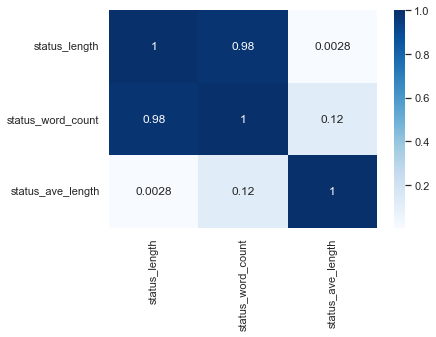

In [61]:
#correlation matrix of  status_length','status_word_count', and 'status_ave_length'
df_word = df[['status_length','status_word_count', 'status_ave_length']].copy()
corr = df_word.corr()
sns.heatmap(corr, cmap="Blues", annot=True);

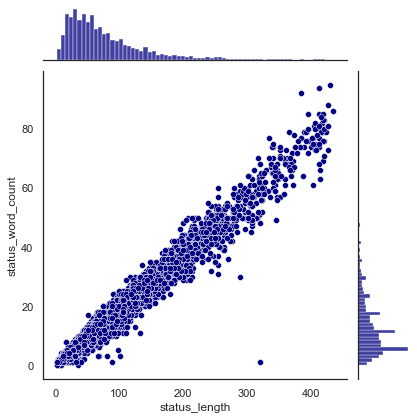

In [62]:
sns.jointplot(data=df, x='status_length', y='status_word_count', color ='navy', palette= 'muted');

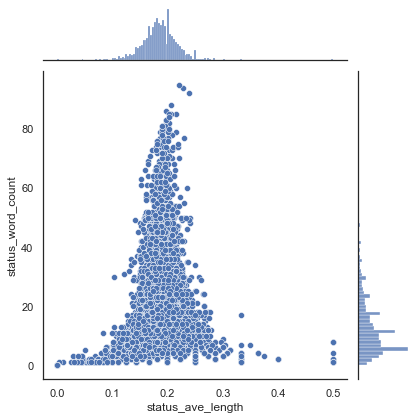

In [63]:
sns.jointplot(data=df, x='status_ave_length', y='status_word_count', palette= 'muted');

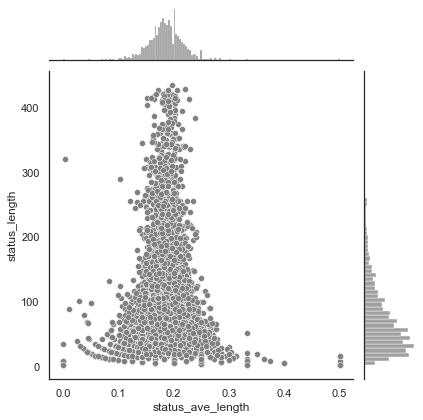

In [64]:
sns.jointplot(data=df, x='status_ave_length', y='status_length',color ='grey', palette= 'muted');

---

## Exploratory vs. Explanatory Data Analysis 

> **Exploratory analysis** is what you do to get familiar with the data. You may start out with a hypothesis or question, or you may just really be delving into the data to determine what might be interesting about it. Exploratory analysis is the process of turning over 100 rocks to find perhaps 1 or 2 precious gemstones.
>
> **Explanatory analysis** is what happens when you have something specific you want to show an audience - probably about those 1 or 2 precious gemstones. In my blogging and writing, I tend to focus mostly on this latter piece, explanatory analysis, when you've already gone through the exploratory analysis and from this have determined something specific you want to communicate to a given audience: in other words, when you want to tell a story with data.

- Cole Nussbaumer Knaflic, [exploratory vs. explanatory analysis](http://www.storytellingwithdata.com/blog/2014/04/exploratory-vs-explanatory-analysis)

### Choose one visual to explain:

Now that you've performed an exploratory data analysis, choose a visual (or 1-3 related visuals) to frame as **_explanatory_**. This can be a visual you created above, or you can create a new visual. For this visual, make sure the visuals are formatted clearly, and provide a one to two paragraph explanation/interpretation of the visual.

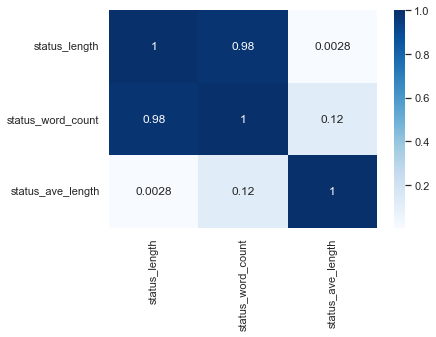

In [65]:
#correlation matrix of  status_length','status_word_count', and 'status_ave_length'
df_word = df[['status_length','status_word_count', 'status_ave_length']].copy()
corr = df_word.corr()
sns.heatmap(corr, cmap="Blues", annot=True);

The distribution of 'status_length' and 'status_word_count' are right skewed, however, the average status length is approximately mormal distributed. The correlation between 'status_length' and 'status_word_count' is very high, while they are almost not correlated with the average status length. It shows that 'status_length' and 'status_word_counts' are very similar in their statistical properties and totally different from average status length. In terms of modelling, we can use 'status_word_counts' and 'status_ave_length' as two different features. 